In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import numpy
import scipy
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import multiprocessing as mpp
import pickle
import os
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
#from hpc_lib import SACCT_data_handler
from hpc_lib import *
#
import pandas
import pathlib

In [37]:
data_file_name='data/sacct_sherlock_out_serc2020_05_08.out'
#
output_path='data'
system_name='test'
h5_filename='{}.h5'.format(os.path.splitext(data_file_name)[0] )
n_cpu=6
pkl_name = "{}.pkl".format(os.path.splitext(data_file_name)[0])



print('*** data_File_name: {}'.format(data_file_name))
print('*** output path: {}'.format(output_path))
print('*** system_name: {}'.format(system_name))
print('*** h5_filename: {}'.format(h5_filename))




*** data_File_name: data/sacct_sherlock_out_serc2020_05_08.out
*** output path: data
*** system_name: test
*** h5_filename: data/sacct_sherlock_out_serc2020_05_08.h5


In [120]:
#with open(pkl_name, 'rb') as fin:
#    sacct_obj = pickle.load(fin)
#
sacct_obj = hpc_lib.SACCT_data_handler(data_file_name=data_file_name, max_rows=None, n_cpu=8)

** load_sact_data(), max_rows=None
*** headers_rw:  User|Group|GID|JobName|JobID|JobIDRaw|Partition|State|Timelimit|NCPUS|NNodes|Submit|Eligible|Start|End|Elapsed|SystemCPU|UserCPU|TotalCPU|NTasks|CPUTimeRAW|Suspended|

*** load data:: headers:  ['User', 'Group', 'GID', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'JobID_parent']
** len:  2677321


/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2276: RuntimeWarning: All-NaN slice encountered
  jobs_summary[['End', 'Start', 'NCPUS', 'NNodes']][k] = numpy.nanmax(sub_data['End']), numpy.nanmin(sub_data['Start']), numpy.max(sub_data['NCPUS']), numpy.max(sub_data['NNodes'])
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2276: RuntimeWarning: All-NaN slice encountered
  jobs_summary[['End', 'Start', 'NCPUS', 'NNodes']][k] = numpy.nanmax(sub_data['End']), numpy.nanmin(sub_data['Start']), numpy.max(sub_data['NCPUS']), numpy.max(sub_data['NNodes'])
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:2276: RuntimeWarning: All-NaN slice encountered
  jobs_summary[['End', 'Start', 'NCPUS', 'NNodes']][k] = numpy.nanmax(sub_data['End']), numpy.nanmin(sub_data['Start']), numpy.max(sub_data['NCPUS']), numpy.max(sub_data['NNodes'])
/Users/myoder96/Codes/HPC_analytics/hpc_lib.py:945: RuntimeWarning: invalid value encountered in greater
  ix_t = numpy.logical_and(t_start<=t.reshape(-1,1), t_end>t.reshap

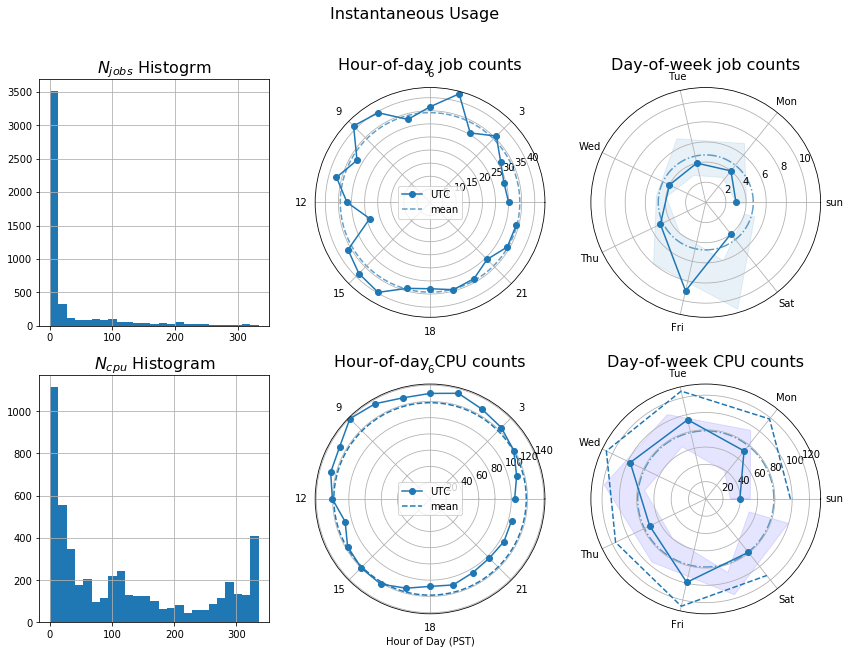

In [122]:
zz = sacct_obj.active_cpu_jobs_per_day_hour_report(periodic_projection='polar')


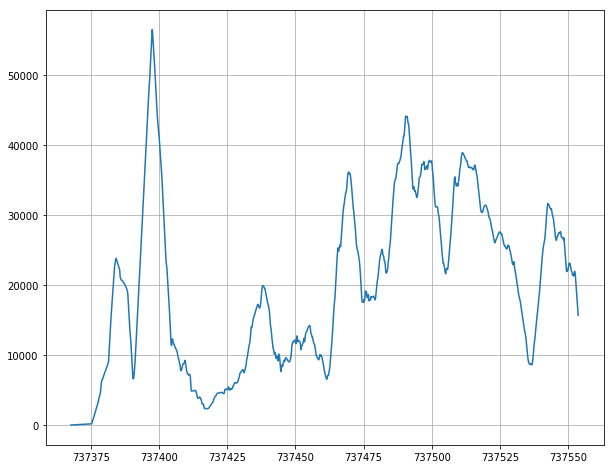

In [124]:
fg = plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
#
ax1.plot(sacct_obj.weekly_hours['time'], sacct_obj.weekly_hours['cpu_hours'])

In [ ]:
myjs_4 = hpc_lib.calc_jobs_summary(data=sacct_obj.data, verbose=0, n_cpu=4, step_size=1000)

In [129]:
weekly_hours = hpc_lib.get_cpu_hours(n_cpu=4, jobs_summary=sacct_obj.jobs_summary[0:100000])
weekly_hours_1 = hpc_lib.get_cpu_hours(n_cpu=1, jobs_summary=sacct_obj.jobs_summary[0:100000])

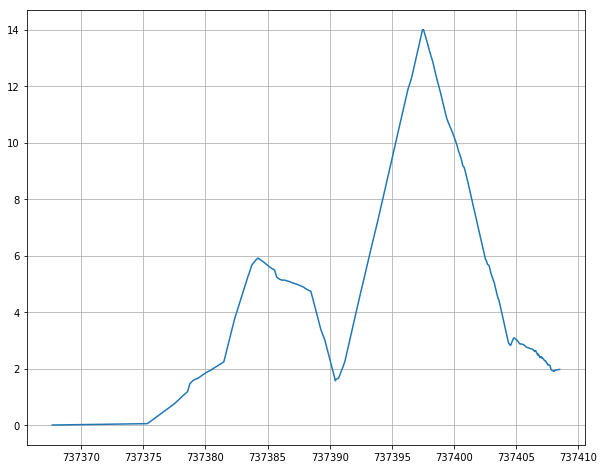

In [139]:
# for k, (rw1, rw2) in enumerate(zip(weekly_hours, weekly_hours_1)):
#     print('***[{}]: {}, {} '.format(k, rw1, rw2))
fg = plt.figure(figsize=(10,8))
ax1 = plt.gca()
ax1.grid()
#
ax1.plot(weekly_hours['time'], weekly_hours['cpu_hours']/(24.*24.*7), ls='-')
#ax1.plot(weekly_hours_1['time'], weekly_hours_1['cpu_hours']+500., ls='-')

In [117]:
k=20131
for c1, c2 in zip(myjs[k], myjs_4[k]):
    print('** [{}]: {}, {}'.format(c1==c2, c1, c2) )

** [True]: 60263, 60263
** [True]: pjwomble, pjwomble
** [True]: gorelick, gorelick
** [True]: 26961, 26961
** [True]: 62d5a48dd802a, 62d5a48dd802a
** [True]: 55317685_24, 55317685_24
** [True]: 55317906, 55317906
** [True]: serc, serc
** [True]: COMPLETED, COMPLETED
** [True]: 0.020833333333333332, 0.020833333333333332
** [True]: 1, 1
** [True]: 1, 1
** [True]: 737388.4775462963, 737388.4775462963
** [True]: 737388.4775578703, 737388.4775578703
** [True]: 737388.4785069445, 737388.4785069445
** [True]: 737388.4803587963, 737388.4803587963
** [True]: 0.0018402777777777777, 0.0018402777777777777
** [True]: 3.729166666666667e-05, 3.729166666666667e-05
** [True]: 0.0013717476851851853, 0.0013717476851851853
** [True]: 0.001409050925925926, 0.001409050925925926
** [False]: nan, nan
** [True]: 159, 159
** [True]: 00:00:00, 00:00:00
** [True]: 55317685_24, 55317685_24


In [51]:
for rw in  (my_dta[0:200])[['JobID', 'JobID_parent']]:
    print('** ', rw)

for rw in sacct_obj.data:
    s = rw['JobID']
    if rw['JobID_parent'] != s[0:(s+'.').index('.')]:
        print('** got one! {}'.format(rw))

**  ('54187830_67', '54187830_67')
**  ('54187830_67.batch', '54187830_67')
**  ('54187830_67.extern', '54187830_67')
**  ('54527957', '54527957')
**  ('54527957.batch', '54527957')
**  ('54527957.extern', '54527957')
**  ('54534435', '54534435')
**  ('54534435.0', '54534435')
**  ('54534435.batch', '54534435')
**  ('54534435.extern', '54534435')
**  ('54563264', '54563264')
**  ('54563264.batch', '54563264')
**  ('54563264.extern', '54563264')
**  ('54695976', '54695976')
**  ('54695976.batch', '54695976')
**  ('54695976.extern', '54695976')
**  ('54727072', '54727072')
**  ('54727072.batch', '54727072')
**  ('54727072.extern', '54727072')
**  ('54739069', '54739069')
**  ('54739069.batch', '54739069')
**  ('54739069.extern', '54739069')
**  ('54752471', '54752471')
**  ('54752471.batch', '54752471')
**  ('54752471.extern', '54752471')
**  ('54754751', '54754751')
**  ('54754751.batch', '54754751')
**  ('54754751.extern', '54754751')
**  ('54755229', '54755229')
**  ('54755229.batch',

In [29]:
my_dta = sacct_obj.data[:]

In [30]:
my_dta.sort(axis=0, order=['JobID', 'Submit'], kind='quicksort')

In [23]:
#ix_s = numpy.argsort(sacct_obj.data, order)

**  [737367.68135417 737367.68555556 737367.68555556 737374.65699074
 737375.28774306 737375.28774306 737374.7081713  737375.19501157
 737375.19501157 737378.93979167]


In [ ]:
ix_sort = numpy.argsort()